## ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

In [2]:
# Library import - data preprocessing 
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

In [3]:
## Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
# torch
import torch 

In [5]:
# ÌèâÍ∞ÄÏßÄÌëú
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import spearmanr

In [6]:
# visulazation
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [7]:
# font manager
import matplotlib.font_manager as fm

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [8]:
# tqdm
from tqdm import tqdm

In [9]:
# kaggle hub
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [10]:
## GPU check
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("ÏÇ¨Ïö©Ï§ëÏù∏ ÎîîÎ∞îÏù¥Ïä§:", device)

ÏÇ¨Ïö©Ï§ëÏù∏ ÎîîÎ∞îÏù¥Ïä§: cuda


In [11]:
print("CUDA ÏÇ¨Ïö© Í∞ÄÎä•?", torch.cuda.is_available())
if torch.cuda.is_available():
    print("ÏÇ¨Ïö© Ï§ëÏù∏ GPU:", torch.cuda.get_device_name(0))
else:
    print("GPUÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

CUDA ÏÇ¨Ïö© Í∞ÄÎä•? True
ÏÇ¨Ïö© Ï§ëÏù∏ GPU: NVIDIA GeForce MX450


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
import re

In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

In [18]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 812.7 kB/s eta 0:00:16
     --------------------------------------- 0.1/12.8 MB 930.9 kB/s eta 0:00:14
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:12
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:12
      --------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:12
      --------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.4/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.4/12.8 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.2 MB


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import spacy
nlp = spacy.load("en_core_web_sm")

## Data Load

In [22]:
# ÌååÏùº Í≤ΩÎ°ú
file_path = r"C:\Users\wonny\OneDrive\Î∞îÌÉï ÌôîÎ©¥\Í≤ΩÌù¨ÎåÄÌïôÍµê\Machine Learning\Team PJ\data\Youtube_Game2_10000.csv"

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv(file_path)

In [23]:
df.head()

video_id                                        title    channel_title  \
0  C6PrhsZ4dLI  Play Game#Kritikachannel#Shorts funny video  Kritika Channel   
1  0e3GPea1Tyg            $456,000 Squid Game In Real Life!          MrBeast   
2  jBOyUo3JaiA     Vlad and story about Worms from the game    Vlad and Niki   
3  yGKhcLK482Y                   Squid Game Dalgona #shorts        Mr DegrEE   
4  iBh3zOjOCvI                Jelly Bean Guessing Game HACK       Mark Rober   

   category_id                                               tags       views  \
0           22                                             [none]  1261217614   
1           24                                             [none]   804577951   
2           24  Vlad|for kids|vlad and nikita|toys|playing|gam...   562644972   
3           22  shorts|squid game|funny|mr degree|mariana|mari...   471345780   
4           28                                             [none]   240356873   

      likes  dislikes  comment_count  \
0  16207795         0              0   
1  19234279         0         628015   
2   1652861         0              0   
3   2619112         0           2969   
4   6154177         0          20292   

                                   thumbnail_link   date keyword  
0  https://i.ytimg.com/vi/C6PrhsZ4dLI/default.jpg  29.10    game  
1  https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg  24.11    game  
2  https://i.ytimg.com/vi/jBOyUo3JaiA/default.jpg  24.05    game  
3  https://i.ytimg.com/vi/yGKhcLK482Y/default.jpg  22.05    game  
4  https://i.ytimg.com/vi/iBh3zOjOCvI/default.jpg  30.04    game

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13906 entries, 0 to 13905
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        13906 non-null  object 
 1   title           13906 non-null  object 
 2   channel_title   13906 non-null  object 
 3   category_id     13906 non-null  int64  
 4   tags            13906 non-null  object 
 5   views           13906 non-null  int64  
 6   likes           13906 non-null  int64  
 7   dislikes        13906 non-null  int64  
 8   comment_count   13906 non-null  int64  
 9   thumbnail_link  13906 non-null  object 
 10  date            13906 non-null  float64
 11  keyword         13906 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.3+ MB


## Data preprocessing

### function definition

In [25]:
def preprocess_title(text):
    if not isinstance(text, str):
        return ""

    # 1. ÏÜåÎ¨∏Ïûê Î≥ÄÌôò
    text = text.lower()

    # 2. ÌäπÏàòÎ¨∏Ïûê, Ïà´Ïûê Ï†úÍ±∞
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy ÌòïÌÉúÏÜå Î∂ÑÏÑù
    doc = nlp(text)

    # 4. Î™ÖÏÇ¨/ÌòïÏö©ÏÇ¨ + Î∂àÏö©Ïñ¥ Ï†úÍ±∞ + ÏõêÌòï Î≥µÏõê
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)


In [26]:
def preprocess_description(text):
    if not isinstance(text, str):
        return ""

    # 1. ÏÜåÎ¨∏Ïûê Î≥ÄÌôò
    text = text.lower()

    # 2. ÌäπÏàòÎ¨∏Ïûê, Ïà´Ïûê Ï†úÍ±∞ (ÏïåÌååÎ≤≥Îßå ÎÇ®ÍπÄ)
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy Î∂ÑÏÑù
    doc = nlp(text)

    # 4. Î∂àÏö©Ïñ¥ Ï†úÍ±∞ + Î™ÖÏÇ¨/ÌòïÏö©ÏÇ¨ + ÏõêÌòï Î≥µÏõê
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)

In [27]:
def count_pos(text):
    if not isinstance(text, str):
        return {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    doc = nlp(text.lower())
    pos_counts = {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    for token in doc:
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1

    return pos_counts

In [28]:
def extract_common_words(row):
    title_words = set(row['cleaned_title'].split())
    desc_words = set(row['cleand_desc'].split())
    common = title_words & desc_words  # ÍµêÏßëÌï©
    return ' '.join(common) if common else ''

### target scaling

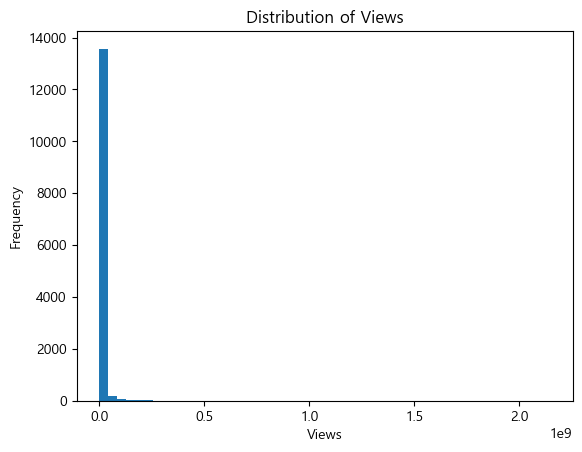

In [30]:
# target Î∂ÑÌè¨ ÌôïÏù∏ 
plt.hist(df['views'], bins=50)
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Distribution of Views')
plt.show()

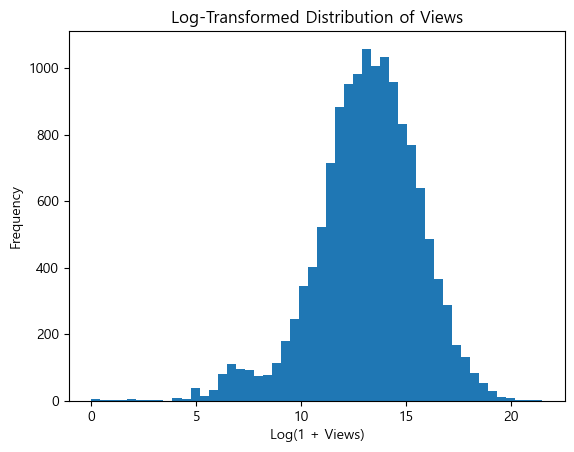

In [31]:
# target log scaling 
df['log_views'] = np.log1p(df['views'])

plt.hist(df['log_views'], bins=50)
plt.xlabel('Log(1 + Views)')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of Views')
plt.show()

In [32]:
# log_views Ïó¥ÏùÑ ÌëúÏ§ÄÌôî
scaler = StandardScaler()
df['log_views_scaled'] = scaler.fit_transform(df[['log_views']])

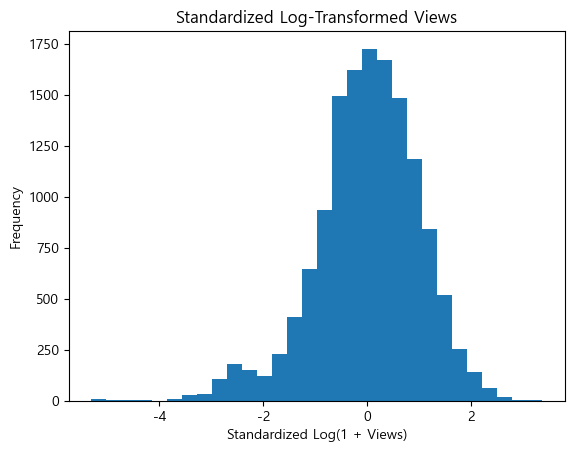

In [34]:
plt.hist(df['log_views_scaled'], bins=30)
plt.title("Standardized Log-Transformed Views")
plt.xlabel("Standardized Log(1 + Views)")
plt.ylabel("Frequency")
plt.show()

### Ï†úÎ™© Ï†ÑÏ≤òÎ¶¨ 

In [35]:
df['cleaned_title'] = df['title'].apply(preprocess_title)

In [38]:
df.head(5)

video_id                                        title    channel_title  \
0  C6PrhsZ4dLI  Play Game#Kritikachannel#Shorts funny video  Kritika Channel   
1  0e3GPea1Tyg            $456,000 Squid Game In Real Life!          MrBeast   
2  jBOyUo3JaiA     Vlad and story about Worms from the game    Vlad and Niki   
3  yGKhcLK482Y                   Squid Game Dalgona #shorts        Mr DegrEE   
4  iBh3zOjOCvI                Jelly Bean Guessing Game HACK       Mark Rober   

   category_id                                               tags       views  \
0           22                                             [none]  1261217614   
1           24                                             [none]   804577951   
2           24  Vlad|for kids|vlad and nikita|toys|playing|gam...   562644972   
3           22  shorts|squid game|funny|mr degree|mariana|mari...   471345780   
4           28                                             [none]   240356873   

      likes  dislikes  comment_count  \
0  16207795         0              0   
1  19234279         0         628015   
2   1652861         0              0   
3   2619112         0           2969   
4   6154177         0          20292   

                                   thumbnail_link   date keyword  log_views  \
0  https://i.ytimg.com/vi/C6PrhsZ4dLI/default.jpg  29.10    game  20.955343   
1  https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg  24.11    game  20.505828   
2  https://i.ytimg.com/vi/jBOyUo3JaiA/default.jpg  24.05    game  20.148159   
3  https://i.ytimg.com/vi/yGKhcLK482Y/default.jpg  22.05    game  19.971103   
4  https://i.ytimg.com/vi/iBh3zOjOCvI/default.jpg  30.04    game  19.297635   

   log_views_scaled                             cleaned_title  
0          3.150488  play gamekritikachannelshort funny video  
1          2.969093                      squid game real life  
2          2.824761                      vlad story worm game  
3          2.753312                  squid game dalgona short  
4          2.481544                jelly bean guess game hack

### ÌíàÏÇ¨Î≥Ñ count

In [39]:
# Í∞Å Ï†úÎ™©ÏóêÏÑú ÌíàÏÇ¨Î≥Ñ Í∞úÏàò Ï∂îÏ∂ú
pos_df = df['title'].apply(count_pos).apply(pd.Series)

# Í∏∞Ï°¥ dfÏôÄ Ìï©ÏπòÍ∏∞
df = pd.concat([df, pos_df], axis=1)

In [40]:
df

video_id                                              title  \
0      C6PrhsZ4dLI        Play Game#Kritikachannel#Shorts funny video   
1      0e3GPea1Tyg                  $456,000 Squid Game In Real Life!   
2      jBOyUo3JaiA           Vlad and story about Worms from the game   
3      yGKhcLK482Y                         Squid Game Dalgona #shorts   
4      iBh3zOjOCvI                      Jelly Bean Guessing Game HACK   
...            ...                                                ...   
13901  wJ-IKNMqaxA  The BIGGEST Devs Listened Moment in Gacha Gami...   
13902  qGQ2o4me2zo  She is my favorite character from Dandy's Word...   
13903  P7kHoa5NZ8A       Hahahaha!/Emoticon #gacha #gachaclub #shorts   
13904  Bw5d58X_6JQ          This NEW Gacha game is secretly using AI!   
13905  UfCeQyNPtcE  Where the hell is my boss?!üò° fc w @Tomixity  #...   

         channel_title  category_id  \
0      Kritika Channel           22   
1              MrBeast           24   
2        Vlad and Niki           24   
3            Mr DegrEE           22   
4           Mark Rober           28   
...                ...          ...   
13901          Aithoma           20   
13902            Lunny           22   
13903       ùêæùëñùëéùëüùëé ÌÇ§ÏïÑÎùºüóù            1   
13904       Faudiedauw           20   
13905    ùìùùì≤ùîÉùì≤ùì∑ùì∏ ùìñùì™ùìµùì≤ùìÆùìΩ           22   

                                                    tags       views  \
0                                                 [none]  1261217614   
1                                                 [none]   804577951   
2      Vlad|for kids|vlad and nikita|toys|playing|gam...   562644972   
3      shorts|squid game|funny|mr degree|mariana|mari...   471345780   
4                                                 [none]   240356873   
...                                                  ...         ...   
13901  wuthering waves|genshin impact|zenless zone ze...        7012   
13902                                             [none]       13891   
13903                                             [none]        7012   
13904                                             [none]        7795   
13905                                             [none]        9880   

          likes  dislikes  comment_count  \
0      16207795         0              0   
1      19234279         0         628015   
2       1652861         0              0   
3       2619112         0           2969   
4       6154177         0          20292   
...         ...       ...            ...   
13901       339         0            168   
13902       347         0             24   
13903       792         0              0   
13904       561         0            166   
13905       621         0             48   

                                       thumbnail_link  ...     keyword  \
0      https://i.ytimg.com/vi/C6PrhsZ4dLI/default.jpg  ...        game   
1      https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg  ...        game   
2      https://i.ytimg.com/vi/jBOyUo3JaiA/default.jpg  ...        game   
3      https://i.ytimg.com/vi/yGKhcLK482Y/default.jpg  ...        game   
4      https://i.ytimg.com/vi/iBh3zOjOCvI/default.jpg  ...        game   
...                                               ...  ...         ...   
13901  https://i.ytimg.com/vi/wJ-IKNMqaxA/default.jpg  ...  gacha game   
13902  https://i.ytimg.com/vi/qGQ2o4me2zo/default.jpg  ...  gacha game   
13903  https://i.ytimg.com/vi/P7kHoa5NZ8A/default.jpg  ...  gacha game   
13904  https://i.ytimg.com/vi/Bw5d58X_6JQ/default.jpg  ...  gacha game   
13905  https://i.ytimg.com/vi/UfCeQyNPtcE/default.jpg  ...  gacha game   

       log_views  log_views_scaled  \
0      20.955343          3.150488   
1      20.505828          2.969093   
2      20.148159          2.824761   
3      19.971103          2.753312   
4      19.297635          2.481544   
...          ...               ...   
13901   8.855521         -1.732216   
13902   9.5390

### Ï°∞ÌöåÏàò ÏÉÅÏúÑ ÏòÅÏÉÅÏóêÏÑú ÏûêÏ£º Îì±Ïû•ÌïòÎäî Îã®Ïñ¥ ÌôïÏù∏

--------------------------------------------------------------------------------------------------------

Ï°∞ÌöåÏàòÍ∞Ä ÎÜíÏùÄ ÏòÅÏÉÅÎì§ÏóêÏÑú ÏûêÏ£º Îì±Ïû•ÌïòÎäî Îã®Ïñ¥ ÌôïÏù∏ÌïòÍ∏∞ (tf-idf)

In [42]:
# Ï°∞ÌöåÏàò Í∏∞Ï§Ä ÏÉÅÏúÑ ÏòÅÏÉÅ vs ÌïòÏúÑ ÏòÅÏÉÅ ÎπÑÍµê 
top_df = df[df['views'] >= df['views'].quantile(0.90)].copy()
bottom_df = df[df['views'] >= df['views'].quantile(0.10)].copy()

In [43]:
## tf-idf
# Î≤°ÌÑ∞Ìôî Í∞ùÏ≤¥ ÏÉùÏÑ±
vectorizer = TfidfVectorizer(
    stop_words='english',      # ÏòÅÏñ¥ Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    max_features=1000,         # ÏÉÅÏúÑ 5000Í∞úÏùò Îã®Ïñ¥Îßå ÏÇ¨Ïö©
    ngram_range=(1, 2)         # unigram + bigram ÏÇ¨Ïö©
)

In [44]:
# Î≤°ÌÑ∞Ìôî ÏàòÌñâ
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# Îã®Ïñ¥ Î™©Î°ù Ï∂îÏ∂ú
tfidf_words = vectorizer.get_feature_names_out()

In [45]:
# Îã®Ïñ¥Î≥Ñ TF-IDF Ï†êÏàò Ìï©Í≥Ñ Íµ¨ÌïòÍ∏∞
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# ÏÉÅÏúÑ 30Í∞ú Îã®Ïñ¥ Î≥¥Í∏∞
print(tfidf_df.head(30))

              word      score
271           game  84.759379
550      minecraft  64.302628
790          short  56.642601
724         roblox  39.894311
35          arcade  33.918963
833       speedrun  31.338759
940          video  30.470087
855          squid  27.692151
856     squid game  24.770694
779        shooter  23.124170
741            rpg  20.969622
941     video game  19.339247
62          battle  18.634080
980          world  18.122991
318         gaming  18.060417
260          funny  17.232360
625       nintendo  15.948966
500            lol  15.666199
614            new  15.631883
309       gameplay  15.195152
738         royale  15.080076
765         second  13.222922
347           good  12.580424
825           song  12.460571
65   battle royale  12.372948
666           play  12.172192
28       animation  12.087143
116      challenge  11.939200
394         horror  11.892535
634       official  11.866821


-----------------------------------------------------------------------------------------------------------

Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï∂úÌòÑ ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ Îã®Ïñ¥Îì§ ÌôïÏù∏ÌïòÍ∏∞ (countvectorizer) 

In [46]:
#CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_counts = vectorizer.fit_transform(top_df['cleaned_title']) 

# Îã®Ïñ¥Î≥Ñ ÎπàÎèÑ Í≥ÑÏÇ∞
word_counts = X_counts.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

# Ï†ïÎ¶¨
count_df = pd.DataFrame({'word': words, 'count': word_counts})
count_df = count_df.sort_values('count', ascending=False)

In [50]:
count_df[count_df['count']>50]

word  count
326       game    453
794      short    271
563  minecraft    188
736     roblox    101
836      squid    100
32      arcade     96
948      video     96
824   speedrun     86
791    shooter     73
315      funny     64
332   gameplay     63
63      battle     62
611        new     62
335     gaming     61
982      world     59

----------------------------------------------------------------------------------------------------------

In [48]:
keywords = [
        'rank', 'op', 'patch', 'update', 'buff', 'nerf', 'new', 'epic',
        'trick', 'tips', 'glitch', 'record', 'kill', 'highlight', 'champion',
        'trailer', 'royale', 'official', 'reveal', 'black', 'multiplayer',
]

pattern = r'\b(?:' + '|'.join(keywords) + r')\b'

df['has_rank_related'] = df['title'].str.lower().str.contains(pattern)

In [49]:
df['has_rank_related'].sum()

np.int64(1860)

### Ï°∞ÌöåÏàò ÏÉÅÏúÑ / ÌïòÏúÑ ÏòÅÏÉÅ ÎπÑÍµê 

In [67]:
# Î≤°ÌÑ∞Ìôî ÏàòÌñâ
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# Îã®Ïñ¥ Î™©Î°ù Ï∂îÏ∂ú
tfidf_words = vectorizer.get_feature_names_out()

# Îã®Ïñ¥Î≥Ñ TF-IDF Ï†êÏàò Ìï©Í≥Ñ Íµ¨ÌïòÍ∏∞
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# ÏÉÅÏúÑ 20Í∞ú Îã®Ïñ¥ Î≥¥Í∏∞
print(tfidf_df.head(30))

              word      score
271           game  84.759379
550      minecraft  64.302628
790          short  56.642601
724         roblox  39.894311
35          arcade  33.918963
833       speedrun  31.338759
940          video  30.470087
855          squid  27.692151
856     squid game  24.770694
779        shooter  23.124170
741            rpg  20.969622
941     video game  19.339247
62          battle  18.634080
980          world  18.122991
318         gaming  18.060417
260          funny  17.232360
625       nintendo  15.948966
500            lol  15.666199
614            new  15.631883
309       gameplay  15.195152
738         royale  15.080076
765         second  13.222922
347           good  12.580424
825           song  12.460571
65   battle royale  12.372948
666           play  12.172192
28       animation  12.087143
116      challenge  11.939200
394         horror  11.892535
634       official  11.866821


In [66]:
# Î≤°ÌÑ∞Ìôî ÏàòÌñâ
X_tfidf = vectorizer.fit_transform(bottom_df['cleaned_title'])

# Îã®Ïñ¥ Î™©Î°ù Ï∂îÏ∂ú
tfidf_words = vectorizer.get_feature_names_out()

# Îã®Ïñ¥Î≥Ñ TF-IDF Ï†êÏàò Ìï©Í≥Ñ Íµ¨ÌïòÍ∏∞
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# ÏÉÅÏúÑ 20Í∞ú Îã®Ïñ¥ Î≥¥Í∏∞
print(tfidf_df.head(30))

                word       score
282             game  821.545940
733              rpg  367.634344
779            short  355.221012
552        minecraft  316.273404
258              fps  276.802858
719           roblox  257.722762
937         valorant  251.294053
334           gaming  236.489383
975            world  235.206736
608         nintendo  220.256615
366             good  212.302918
819         speedrun  197.845898
652             play  195.007531
596              new  193.974173
774          shooter  190.911204
36            arcade  190.865225
873           switch  188.135878
421           horror  173.698394
764            setup  170.843647
628             open  168.812465
629       open world  159.232409
274            gacha  157.172431
943            video  155.380719
54            battle  151.375055
610  nintendo switch  151.027924
570           mobile  146.309603
422      horror game  141.995383
730           royale  141.330527
638               pc  140.939414
325       

### clustering

In [55]:
## ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ 
titles = df['cleaned_title']

#TF-IDF Î≤°ÌÑ∞Ìôî
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=1000,
    ngram_range=(1, 2)
)
X_tfidf = vectorizer.fit_transform(titles)

#Îã®Ïñ¥ Î≤°ÌÑ∞ Ï∂îÏ∂ú (Î¨∏ÏÑú-Îã®Ïñ¥ ÌñâÎ†¨ Ï†ÑÏπò ‚Üí Îã®Ïñ¥ x Î¨∏ÏÑú ÌñâÎ†¨)
X_words = X_tfidf.T

#KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
n_clusters = 5  # Íµ∞Ïßë ÏàòÎäî Ïã§ÌóòÌïòÎ©¥ÏÑú Ï°∞Ï†ï Í∞ÄÎä•
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
word_labels = kmeans.fit_predict(X_words)

#ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Ï†ïÎ¶¨
words = vectorizer.get_feature_names_out()
cluster_df = pd.DataFrame({'word': words, 'cluster': word_labels})

#ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îã®Ïñ¥ Î¶¨Ïä§Ìä∏ ÌôïÏù∏
cluster_groups = cluster_df.groupby('cluster')['word'].apply(list).reset_index(name='words')

#ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îã®Ïñ¥ Ï∂úÎ†•
for idx, row in cluster_groups.iterrows():
    print(f"üìå Cluster {row['cluster']}:")
    print(", ".join(row['words']))
    print("-" * 50)

üìå Cluster 0:
aaa, accessory, ace, action, active, actually, ad, ad review, add, adventure, age, age ape, agent, ai, aku, albion, albiononline, alpha, alpha season, amazing, amazon, america, android, android game, android gameplay, android good, android high, android io, android ios, android short, androidio, animal, animation, anime, ape, ape ad, ape short, app, april, arcade duncan, arcade fnaf, arcade game, arena, army, art, asmr, atlan, attack, audio, auto, awesome, baby, bad, bad fighting, ball, ban, base, baseball, bassball, battle, battle royal, battle royale, battle simulator, battlefield, bear, beat, beginner, bgmi, bharti, bharti singh, big, bike, bike drive, bike game, black, blg, blood, blue, bmp, bodycam, boost, boss, box, boy, brainrot, brainrot speedrun, brawl, brawl star, brawlstar, break, bro, brookhaven, budget, build dream, building, bus, buy, car, car game, cara, card, cartoon, cat, ce, challenge, champion, championship, change, chapter, character, charlie, cheap,

In [58]:
#Ï†úÎ™©, Îã®Ïñ¥ ÌÅ¥Îü¨Ïä§ÌÑ∞, Ï°∞ÌöåÏàò Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
titles = df['cleaned_title'].astype(str).tolist()
views = df['views'].tolist()
word_cluster_map = dict(zip(cluster_df['word'], cluster_df['cluster']))  # Îã®Ïñ¥ ‚Üí ÌÅ¥Îü¨Ïä§ÌÑ∞Î≤àÌò∏

#Ï†úÎ™©Î≥Ñ Ìè¨Ìï®Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ Î™©Î°ù ÎßåÎì§Í∏∞
title_clusters = []

for title in titles:
    found_clusters = set()
    for word in word_cluster_map:
        if word in title:
            found_clusters.add(word_cluster_map[word])
    title_clusters.append(list(found_clusters))

#Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏ Í∏∞Ï§ÄÏúºÎ°ú Ìï¥ÎãπÎêòÎäî Ï°∞ÌöåÏàò Î™®ÏúºÍ∏∞
cluster_to_views = {}

for clusters, view in zip(title_clusters, views):
    for c in clusters:
        if c not in cluster_to_views:
            cluster_to_views[c] = []
        cluster_to_views[c].append(view)

#ÌèâÍ∑† Ï°∞ÌöåÏàò Í≥ÑÏÇ∞
cluster_avg_views = {
    c: np.mean(vlist) for c, vlist in cluster_to_views.items() if len(vlist) > 0
}

#Í≤∞Í≥º Ï∂úÎ†•
for c, avg in sorted(cluster_avg_views.items()):
    print(f"üìä Cluster {c} - ÌèâÍ∑† Ï°∞ÌöåÏàò: {round(avg):,}Ìöå")

üìä Cluster 0 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 5,521,832Ìöå
üìä Cluster 1 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 12,194,151Ìöå
üìä Cluster 2 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 2,530,507Ìöå
üìä Cluster 3 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 4,849,262Ìöå
üìä Cluster 4 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 13,264,122Ìöå


### Ï°∞ÌöåÏàò Íµ¨Í∞ÑÎ≥Ñ Ï†úÎ™© Í∏∏Ïù¥ Î∞è Îã®Ïñ¥ Ïàò

In [59]:
# Îã®Ïñ¥ Ïàò Í≥ÑÏÇ∞
df['title_cnt'] = df['cleaned_title'].apply(lambda x: len(x.split()))

# ÌôïÏù∏
df.head(5)

video_id                                        title    channel_title  \
0  C6PrhsZ4dLI  Play Game#Kritikachannel#Shorts funny video  Kritika Channel   
1  0e3GPea1Tyg            $456,000 Squid Game In Real Life!          MrBeast   
2  jBOyUo3JaiA     Vlad and story about Worms from the game    Vlad and Niki   
3  yGKhcLK482Y                   Squid Game Dalgona #shorts        Mr DegrEE   
4  iBh3zOjOCvI                Jelly Bean Guessing Game HACK       Mark Rober   

   category_id                                               tags       views  \
0           22                                             [none]  1261217614   
1           24                                             [none]   804577951   
2           24  Vlad|for kids|vlad and nikita|toys|playing|gam...   562644972   
3           22  shorts|squid game|funny|mr degree|mariana|mari...   471345780   
4           28                                             [none]   240356873   

      likes  dislikes  comment_count  \
0  16207795         0              0   
1  19234279         0         628015   
2   1652861         0              0   
3   2619112         0           2969   
4   6154177         0          20292   

                                   thumbnail_link  ...  log_views_scaled  \
0  https://i.ytimg.com/vi/C6PrhsZ4dLI/default.jpg  ...          3.150488   
1  https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg  ...          2.969093   
2  https://i.ytimg.com/vi/jBOyUo3JaiA/default.jpg  ...          2.824761   
3  https://i.ytimg.com/vi/yGKhcLK482Y/default.jpg  ...          2.753312   
4  https://i.ytimg.com/vi/iBh3zOjOCvI/default.jpg  ...          2.481544   

                              cleaned_title  NOUN  PROPN ADJ  VERB  INTJ  NUM  \
0  play gamekritikachannelshort funny video     1      1   1     1     0    0   
1                      squid game real life     2      0   2     0     0    1   
2                      vlad story worm game     3      0   1     0     0    0   
3                  squid game dalgona short     4      0   1     0     0    0   
4                jelly bean guess game hack     3      0   1     1     0    0   

   has_rank_related  title_cnt  
0             False          4  
1             False          4  
2             False          4  
3             False          4  
4             False          5  

[5 rows x 23 columns]

In [60]:
# Ï†úÎ™© Í∏∏Ïù¥ Í≥ÑÏÇ∞ 
df['title_len'] = df['title'].apply(lambda x: len(x))

# ÌôïÏù∏
df.head(5)

video_id                                        title    channel_title  \
0  C6PrhsZ4dLI  Play Game#Kritikachannel#Shorts funny video  Kritika Channel   
1  0e3GPea1Tyg            $456,000 Squid Game In Real Life!          MrBeast   
2  jBOyUo3JaiA     Vlad and story about Worms from the game    Vlad and Niki   
3  yGKhcLK482Y                   Squid Game Dalgona #shorts        Mr DegrEE   
4  iBh3zOjOCvI                Jelly Bean Guessing Game HACK       Mark Rober   

   category_id                                               tags       views  \
0           22                                             [none]  1261217614   
1           24                                             [none]   804577951   
2           24  Vlad|for kids|vlad and nikita|toys|playing|gam...   562644972   
3           22  shorts|squid game|funny|mr degree|mariana|mari...   471345780   
4           28                                             [none]   240356873   

      likes  dislikes  comment_count  \
0  16207795         0              0   
1  19234279         0         628015   
2   1652861         0              0   
3   2619112         0           2969   
4   6154177         0          20292   

                                   thumbnail_link  ...  \
0  https://i.ytimg.com/vi/C6PrhsZ4dLI/default.jpg  ...   
1  https://i.ytimg.com/vi/0e3GPea1Tyg/default.jpg  ...   
2  https://i.ytimg.com/vi/jBOyUo3JaiA/default.jpg  ...   
3  https://i.ytimg.com/vi/yGKhcLK482Y/default.jpg  ...   
4  https://i.ytimg.com/vi/iBh3zOjOCvI/default.jpg  ...   

                              cleaned_title NOUN  PROPN  ADJ VERB  INTJ  NUM  \
0  play gamekritikachannelshort funny video    1      1    1    1     0    0   
1                      squid game real life    2      0    2    0     0    1   
2                      vlad story worm game    3      0    1    0     0    0   
3                  squid game dalgona short    4      0    1    0     0    0   
4                jelly bean guess game hack    3      0    1    1     0    0   

   has_rank_related  title_cnt  title_len  
0             False          4         43  
1             False          4         33  
2             False          4         40  
3             False          4         26  
4             False          5         29  

[5 rows x 24 columns]

-----------------------------------------------------------------------------------------------------------

Ï°∞ÌöåÏàò Íµ¨Í∞ÑÎ≥ÑÎ°ú ÌèâÍ∑†Í∞íÏóê Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏

In [61]:
# Íµ¨Í∞Ñ 5Íµ¨Í∞ÑÏúºÎ°ú Î∂ÑÌï† 
df['views_bin'] = pd.qcut(df['views'], q=3, labels=[1,2,3])

In [62]:
grouped = df.groupby('views_bin').agg({
    'title_cnt': 'mean',
    'views': 'mean',
    'title_cnt' : 'mean',
    'title_len' : 'mean'
}).reset_index()

print(grouped)

  views_bin  title_cnt         views  title_len
0         1   6.815750  7.781510e+04  62.078533
1         2   6.547357  6.866829e+05  57.259331
2         3   6.330457  1.578271e+07  54.644090


C:\Users\wonny\AppData\Local\Temp\ipykernel_24052\1109606012.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('views_bin').agg({


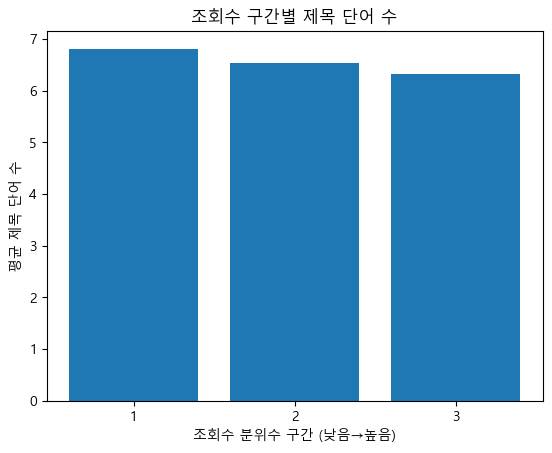

In [63]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_cnt'])
plt.xlabel('Ï°∞ÌöåÏàò Î∂ÑÏúÑÏàò Íµ¨Í∞Ñ (ÎÇÆÏùå‚ÜíÎÜíÏùå)')
plt.ylabel('ÌèâÍ∑† Ï†úÎ™© Îã®Ïñ¥ Ïàò')
plt.title('Ï°∞ÌöåÏàò Íµ¨Í∞ÑÎ≥Ñ Ï†úÎ™© Îã®Ïñ¥ Ïàò')
plt.show()

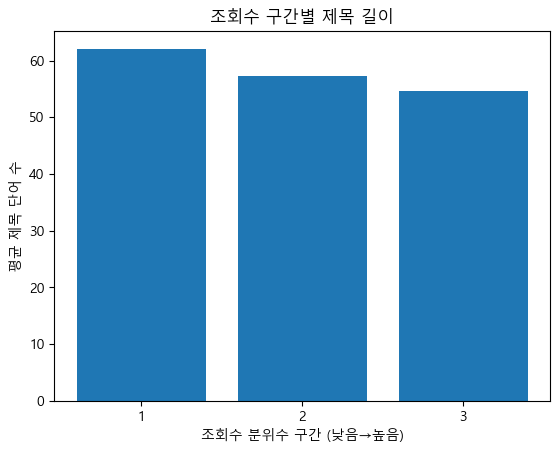

In [64]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_len'])
plt.xlabel('Ï°∞ÌöåÏàò Î∂ÑÏúÑÏàò Íµ¨Í∞Ñ (ÎÇÆÏùå‚ÜíÎÜíÏùå)')
plt.ylabel('ÌèâÍ∑† Ï†úÎ™© Îã®Ïñ¥ Ïàò')
plt.title('Ï°∞ÌöåÏàò Íµ¨Í∞ÑÎ≥Ñ Ï†úÎ™© Í∏∏Ïù¥')
plt.show()

In [65]:
# Î∂ÑÏúÑÏàò Íµ¨Í∞ÑÎ≥ÑÎ°ú title_cnt Î∂ÑÎ¶¨
group1 = df[df['views_bin'] == 1]['title_cnt']
group2 = df[df['views_bin'] == 2]['title_cnt']
group3 = df[df['views_bin'] == 3]['title_cnt']

# ANOVA ÌÖåÏä§Ìä∏
f_stat, p_val = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

NameError: name 'f_oneway' is not defined

### descriptionÍ≥º titleÏóê Í≤πÏπòÎäî Îã®Ïñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏

In [153]:
game_df

title     views   likes  \
131                 L.A. Noire - Nintendo Switch Trailer    154872    7683   
392                 L.A. Noire - Nintendo Switch Trailer    161231    7803   
405                                       Our First Date    224426   17784   
619                                       Our First Date    463992   25840   
652                         Playing CUPHEAD with MatPat!     55460    3871   
...                                                  ...       ...     ...   
40874  Pok√©mon: Let's Go, Pikachu! and Pok√©mon: Let's...   9992803  230507   
40911        The Sims 4 Seasons: Official Reveal Trailer   1749832   77408   
40919  The History of Fortnite Battle Royale - Did Yo...    324219    7840   
40936              LIE DETECTOR TEST WITH MY GIRLFRIEND!   3229540  109945   
40948  Official Call of Duty¬Æ: Black Ops 4 ‚Äî¬†Multipla...  10306119  357079   

                                             description  log_views  \
131    Amid the post-war boom of Hollywood's Golden A...  11.950361   
392    Amid the post-war boom of Hollywood's Golden A...  11.990600   
405    Here's an animation short of our First Date! W...  12.321306   
619    Here's an animation short of our First Date! W...  13.047625   
652    After my appearance on GTLive, MatPat (Game Th...  10.923435   
...                                                  ...        ...   
40874  Return to the Kanto region and experience a cl...  16.117376   
40911  Add weather to your Sims‚Äô lives to tell new st...  14.375031   
40919  Thanks to Skillshare for sponsoring this video...  12.689178   
40936  Talia: https://www.youtube.com/user/nataliahad...  14.987851   
40948  Call of Duty: Black Ops 4 Multiplayer raises t...  16.148248   

       log_views_scaled                                      cleaned_title  \
131           -1.291706                   la noire nintendo switch trailer   
392           -1.265922                   la noire nintendo switch trailer   
405           -1.054013                                               date   
619           -0.588606                                               date   
652           -1.949735                                play cuphead matpat   
...                 ...                                                ...   
40874          1.378417        pokmon let pikachu pokmon let eevee trailer   
40911          0.261964                sims season official reveal trailer   
40919         -0.818290  history fortnite battle royale know game feat ...   
40936          0.654644                       lie detector test girlfriend   
40948          1.398199  official duty black op multiplayer reveal trailer   

                                             cleand_desc  NOUN  PROPN  ADJ  \
131    postwar boom hollywood golden age cole phelp l...     2      4    0   
392    postwar boom hollywood golden age cole phelp l...     2      4    0   
405    here animation short date excited hear think l...     1      0    1   
619    here animation short date excited hear think l...     1      0    1   
652    appearance gtlive matpat game theory play cuph...     1      1    0   
...                                                  ...   ...    ...  ...   
40874  return kanto region experience classic pokmon ...     2      3    0   
40911  add weather sim live tell new story enjoy seas...     3      0    1   
40919  thank skillshare sponsor video people sign lin...     4      1    1   
40936  talia httpswwwyoutubecomusernataliahaddockjosh...     4      0    0   
40948  duty black op multiplayer raise bar famed mult...     6      0    2   

       VERB  INTJ  NUM  has_rank_related  title_cnt  title_len views_bin  
131       0     0    0              True          5         36         1  
392       0     0    0              True          5         36         1  
405       0     0    0             False          1         14         1  
619       0     0    0             False          1         14         1  
652 

In [155]:
# Í≤πÏπòÎäî Îã®Ïñ¥ ÌÉêÏÉâ
game_df['common_words'] = game_df.apply(extract_common_words, axis=1)

In [156]:
# Í∞úÏàòÍπåÏßÄ Í∞ôÏù¥ ÏÑ∏Í∏∞
game_df['n_common_words'] = game_df['common_words'].apply(lambda x: len(x.split()) if x else 0)

In [158]:
game_df['n_common_words']

131      4
392      4
405      1
619      1
652      2
        ..
40874    4
40911    0
40919    6
40936    0
40948    4
Name: n_common_words, Length: 817, dtype: int64

In [169]:
# Ï°∞ÌöåÏàò Íµ¨Í∞ÑÏóê Îî∞Îùº Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ 
grouped = game_df.groupby('views_bin').agg({
    'views' : 'mean',
    'n_common_words': 'mean',
    'NOUN' : 'mean',
    'PROPN' : 'mean',
    'VERB' : 'mean',
    'INTJ' : 'mean',
    'NUM' : 'mean'
}).reset_index()

print(grouped)

  views_bin         views  n_common_words      NOUN     PROPN      VERB  INTJ  \
0         1  3.300992e+05        3.032967  2.604396  1.637363  0.769231   0.0   
1         2  1.630028e+06        2.338235  2.691176  1.073529  0.779412   0.0   
2         3  5.910787e+06        2.959559  3.474265  0.591912  0.852941   0.0   

        NUM  
0  0.472527  
1  0.352941  
2  0.312500  


C:\Users\wonny\AppData\Local\Temp\ipykernel_22328\2622363220.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = game_df.groupby('views_bin').agg({


-----------------------------------------------------------------------------------------------------------

### ÏµúÏ¢Ö ÏòàÏ∏°

------------------------------------------------------------------------------------------------------

ÌÇ§ÏõåÎìú ÏÇ¨Ï†Ñ Íµ¨Ï∂ï

In [68]:
# Ï°∞ÌöåÏàòÍ∞Ä ÎÜíÏùÄ ÏòÅÏÉÅÏóê ÏûêÏ£º Îì±Ïû•ÌïòÎäî ÌÇ§ÏõåÎìú ÏÇ¨Ï†Ñ Íµ¨Ï∂ï 
keywords = [
        'rank', 'op', 'patch', 'update', 'buff', 'nerf', 'new', 'epic',
        'trick', 'tips', 'glitch', 'record', 'kill', 'highlight', 'champion',
        'trailer', 'royale', 'official', 'reveal', 'black', 'multiplayer',
    'shooter', 'video', 'short', 'funny', 'battle', 'rpg', 'world', 'gaming',
    'funny', 'arcade'
]

hype_words = ['insane', 'crazy', 'unbelievable', 'god', '1v5', 'clutch']

ÌäπÏßï Ï∂îÏ∂ú Ìï®Ïàò Ï†ïÏùò

In [84]:
def extract_features(row):
    features = {}

    # ÏõêÎ≥∏ ÌÖçÏä§Ìä∏
    title = row['title'] if isinstance(row['title'], str) else ''

    # Ï†ÑÏ≤òÎ¶¨Îêú ÌÖçÏä§Ìä∏
    cleaned_title = preprocess_title(title)

    # Ï†úÎ™© Í∏∏Ïù¥ Î∞è Îã®Ïñ¥ Ïàò 
    features['title_len'] = len(title)
    features['title_cnt'] = len(cleaned_title.split())

    # ÎäêÎÇåÌëú / Î¨ºÏùåÌëú Í∞úÏàò
    features['num_exclamations'] = title.count('!')
    features['num_questions'] = title.count('?')

    # Ïà´Ïûê Ìè¨Ìï® Ïó¨Î∂Ä 
    features['has_number'] = int(bool(re.search(r'\d', title)))
    features['starts_with_number'] = int(bool(re.match(r'^\d', title.strip())))  

    # ÌÇ§ÏõåÎìú Ìè¨Ìï® Ïó¨Î∂Ä 
    keywords = [
        'rank', 'op', 'patch', 'update', 'buff', 'nerf', 'new', 'epic',
        'trick', 'tips', 'glitch', 'record', 'kill', 'highlight', 'champion',
        'trailer', 'royale', 'official', 'reveal', 'black', 'multiplayer'
    ]
    features['has_keyword'] = int(any(word in cleaned_title for word in keywords))

    # ÎåÄÎ¨∏Ïûê ÎπÑÏú® 30% Ïù¥ÏÉÅ Ïó¨Î∂Ä
    features['is_caps_heavy'] = int(sum(1 for c in title if c.isupper()) > len(title) * 0.3)

    # ÌíàÏÇ¨ Ïπ¥Ïö¥Ìä∏
    pos_counts = count_pos(title)
    features.update(pos_counts)

    return features


Ï†êÏàò Í≥ÑÏÇ∞ Ìï®Ïàò Ï†ïÏùò

In [77]:
def compute_rule_score(features):
    score = 0

    # 1. Ï†úÎ™© Í∏∏Ïù¥: ÏßßÏùÑÏàòÎ°ù Í∞ÄÏÇ∞Ï†ê
    score += -0.03 * features['title_len']

    # 2. Îã®Ïñ¥ Ïàò: 
    score -= 0.3 * features['title_cnt']

    # 3. ÎäêÎÇåÌëú / Î¨ºÏùåÌëú Í∞úÏàò
    score += 0.3 * features['num_exclamations']
    score += 0.3 * features['num_questions']

    # 4. Ïà´Ïûê Ìè¨Ìï® Ïó¨Î∂Ä
    score += 0.5 * features['has_number']

    # 5. Ïà´ÏûêÎ°ú ÏãúÏûë
    score -= 0.1 * features['starts_with_number']

    # 6. ÌÇ§ÏõåÎìú Ìè¨Ìï® Ïó¨Î∂Ä
    score += 0.8 * features['has_keyword']

    # 7. ÎåÄÎ¨∏Ïûê ÎπÑÏú®Ïù¥ ÎÜíÏùÄ Í≤ΩÏö∞
    score -= 0.3 * features['is_caps_heavy']

    # 8. ÌíàÏÇ¨ Í∏∞Î∞ò: Î™ÖÏÇ¨¬∑ÎèôÏÇ¨ ÎßéÏúºÎ©¥ ÎÇ¥Ïö© ÌíçÎ∂Ä, Í≥†Ïú†Î™ÖÏÇ¨ ÎßéÏúºÎ©¥ Ïò§ÌûàÎ†§ ÏùºÎ∞òÏÑ±‚Üì
    score += 0.8 * features.get('NOUN', 0)
    score += 0.5 * features.get('VERB', 0)
    score += -0.1 * features.get('PROPN', 0)  # Í≥†Ïú†Î™ÖÏÇ¨ ÎßéÏúºÎ©¥ Í∞ÄÏ§ëÏπò ÎÇÆÏ∂§

    return score

Ïã§Ï†ú Ï†ÅÏö©Ìï† Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÇ¨Ïö©Ìï† ÏπºÎüºÎßå Î∂àÎü¨Ïò§Í∏∞

In [78]:
game = df[['title', 'views']].copy()

ÌÉÄÍ≤ü Ïä§ÏºÄÏùºÎßÅ

In [79]:
# target scaling
game['log_views'] = np.log1p(game['views'])

scaler = StandardScaler()
game['scaled_views'] = scaler.fit_transform(game[['log_views']])

In [80]:
game = game.drop(columns = ['views', 'log_views'])
game

title  scaled_views
0            Play Game#Kritikachannel#Shorts funny video      3.150488
1                      $456,000 Squid Game In Real Life!      2.969093
2               Vlad and story about Worms from the game      2.824761
3                             Squid Game Dalgona #shorts      2.753312
4                          Jelly Bean Guessing Game HACK      2.481544
...                                                  ...           ...
13901  The BIGGEST Devs Listened Moment in Gacha Gami...     -1.732216
13902  She is my favorite character from Dandy's Word...     -1.456380
13903       Hahahaha!/Emoticon #gacha #gachaclub #shorts     -1.732216
13904          This NEW Gacha game is secretly using AI!     -1.689504
13905  Where the hell is my boss?!üò° fc w @Tomixity  #...     -1.593865

[13906 rows x 2 columns]

In [81]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13906 entries, 0 to 13905
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         13906 non-null  object 
 1   scaled_views  13906 non-null  float64
dtypes: float64(1), object(1)
memory usage: 217.4+ KB


Ìï®Ïàò Ï†ÅÏö©

In [85]:
game['features'] = game.apply(extract_features, axis=1)

In [86]:
game['rule_score'] = game['features'].apply(compute_rule_score)

### (ÏòàÏ∏° 1) ÏßÄÏàòÌï®ÏàòÎ°ú ÏòàÏ∏°

In [87]:
def score_to_views(score, base=1e5):
    return int(base * np.exp(score / 3))

In [88]:
game['predicted_views'] = game['rule_score'].apply(score_to_views)

In [89]:
game[['title', 'scaled_views', 'rule_score', 'predicted_views']].sort_values(by='scaled_views', ascending=False).head()

title  scaled_views  \
6475                 Bubble Shooter Playing with Family      3.364899   
0           Play Game#Kritikachannel#Shorts funny video      3.150488   
1                     $456,000 Squid Game In Real Life!      2.969093   
500   K/DA - POP/STARS (ft. Madison Beer, (G)I-DLE, ...      2.871857   
2              Vlad and story about Worms from the game      2.824761   

        rule_score  predicted_views  
6475  9.800000e-01           138633  
0    -1.290000e+00            65050  
1     2.100000e-01           107250  
500  -9.600000e-01            72614  
2     4.440892e-16           100000

In [90]:
# ÏòàÏ∏°Í∞íÏùÑ log-scaling + standardizationÌïú Í≤ÉÍ≥º ÎßûÏ∂îÎ†§Î©¥:
pred_scaled = np.log1p(game['predicted_views'])
pred_scaled = (pred_scaled - pred_scaled.mean()) / pred_scaled.std()

# Ïã§Ï†úÍ∞í
true_scaled = game['scaled_views']

In [91]:
rmse = mean_squared_error(game['scaled_views'], pred_scaled, squared=False)
r2 = r2_score(true_scaled, pred_scaled)

print(f"RMSE: {rmse:.4f}")
print(f"R¬≤: {r2:.4f}")

RMSE: 1.4836
R¬≤: -1.2010


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### (ÏòàÏ∏° 2) Linear Regression

In [92]:
# X, y Ï†ïÏùò
X = game[['rule_score']]  # ÎèÖÎ¶Ω Î≥ÄÏàò: rule Í∏∞Î∞ò Ï†êÏàò
y = game['scaled_views']  # Ï¢ÖÏÜç Î≥ÄÏàò: log + ÌëúÏ§ÄÌôîÎêú Ï°∞ÌöåÏàò

# ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = LinearRegression()
model.fit(X, y)

# ÏòàÏ∏°
y_pred = model.predict(X)

# ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R¬≤: {r2:.4f}")

RMSE: 0.9949
R¬≤: 0.0101


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Í∞ÄÏ§ëÏπò ÏàòÏ†ïÏùÑ ÏúÑÌïú ÌöåÍ∑ÄÍ≥ÑÏàò ÌôïÏù∏

In [93]:
# ÌîºÏ≤ò Ï∂îÏ∂ú
features_df = game.apply(extract_features, axis=1, result_type='expand')

# ÎèÖÎ¶ΩÎ≥ÄÏàò(X), Ï¢ÖÏÜçÎ≥ÄÏàò(y)
X = features_df.drop(columns = 'common_words', errors = 'ignore')  
y = game['scaled_views']

# Î™®Îç∏ ÌïôÏäµ
model = LinearRegression()
model.fit(X, y)

# ÏòàÏ∏°
y_pred = model.predict(X)

# ÏÑ±Îä• ÌèâÍ∞Ä
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

# Í≤∞Í≥º Ï∂úÎ†•
print("RMSE:", round(rmse, 4))
print("R¬≤:", round(r2, 4))

# Í≥ÑÏàò ÌôïÏù∏
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("\n Feature Importance (Í≥ÑÏàò):")
print(coefficients)

RMSE: 0.9653
R¬≤: 0.0682

 Feature Importance (Í≥ÑÏàò):
has_keyword          -0.305676
starts_with_number   -0.150011
INTJ                 -0.084877
is_caps_heavy        -0.084076
num_questions        -0.075288
title_cnt             0.060302
has_number           -0.044869
NUM                  -0.031750
ADJ                   0.028304
PROPN                 0.026333
title_len            -0.014342
num_exclamations     -0.009336
NOUN                  0.003710
VERB                  0.000971
dtype: float64


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-----------------------------------------------------------------------------------------------------

Ï†êÏàò Í∞ÄÏ§ëÏπò ÏàòÏ†ï ÌõÑ Îã§Ïãú ÏòàÏ∏°

In [94]:
def compute_rule_score_modified(features):
    score = 0

    # 1. Ï†úÎ™© Í∏∏Ïù¥: ÏßßÏùÑÏàòÎ°ù Í∞ÄÏÇ∞Ï†ê
    score += 0.03 * features['title_len']

    # 2. Îã®Ïñ¥ Ïàò: Ï†ÅÏùÑÏàòÎ°ù ÌÅ¥Î¶≠ Ïú†ÎèÑ Í∞ÄÎä•ÏÑ± ÏûàÏùå
    score += 0.3 * features['title_cnt']

    # 3. ÎäêÎÇåÌëú / Î¨ºÏùåÌëú Í∞úÏàò
    score -= 0.3 * features['num_exclamations']
    score -= 0.3 * features['num_questions']

    # 4. Ïà´Ïûê Ìè¨Ìï® Ïó¨Î∂Ä
    score -= 0.7 * features['has_number']

    # 5. Ïà´ÏûêÎ°ú ÏãúÏûë
    score -= 0.8 * features['starts_with_number']

    # 6. ÌÇ§ÏõåÎìú Ìè¨Ìï® Ïó¨Î∂Ä
    score -= 0.8 * features['has_keyword']

    # 7. ÎåÄÎ¨∏Ïûê ÎπÑÏú®Ïù¥ ÎÜíÏùÄ Í≤ΩÏö∞
    score -= 0.3 * features['is_caps_heavy']

    # 8. ÌíàÏÇ¨ Í∏∞Î∞ò: Î™ÖÏÇ¨¬∑ÎèôÏÇ¨ ÎßéÏúºÎ©¥ ÎÇ¥Ïö© ÌíçÎ∂Ä, Í≥†Ïú†Î™ÖÏÇ¨ ÎßéÏúºÎ©¥ Ïò§ÌûàÎ†§ ÏùºÎ∞òÏÑ±‚Üì
    score += 0.7 * features.get('NOUN', 0)
    score += 0.7 * features.get('VERB', 0)
    score += 0.1 * features.get('PROPN', 0)  # Í≥†Ïú†Î™ÖÏÇ¨ ÎßéÏúºÎ©¥ Í∞ÄÏ§ëÏπò ÎÇÆÏ∂§

    return score

In [95]:
game['rule_score_modified'] = game['features'].apply(compute_rule_score_modified)

In [96]:
# X, y Ï†ïÏùò
X = game[['rule_score_modified']]  # ÎèÖÎ¶Ω Î≥ÄÏàò: rule Í∏∞Î∞ò Ï†êÏàò
y = game['scaled_views']  # Ï¢ÖÏÜç Î≥ÄÏàò: log + ÌëúÏ§ÄÌôîÎêú Ï°∞ÌöåÏàò

# ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = LinearRegression()
model.fit(X, y)

# ÏòàÏ∏°
y_pred = model.predict(X)

# ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R¬≤: {r2:.4f}")

RMSE: 0.9943
R¬≤: 0.0114


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
